In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv(r"C:\Users\hp\Downloads\Uber trip.csv",encoding='latin1')

In [3]:
data.head()

,Date/Time,Lat,Lon,Base
0,04-01-2014 00:11,40.7690,-73.9549,B02512
1,04-01-2014 00:17,40.7267,-74.0345,B02512
2,04-01-2014 00:21,40.7316,-73.9873,B02512
3,04-01-2014 00:28,40.7588,-73.9776,B02512
4,04-01-2014 00:33,40.7594,-73.9722,B02512


In [4]:
data.shape

(564516, 4)

In [5]:
data.describe

<bound method NDFrame.describe of                  Date/Time      Lat      Lon    Base
0         04-01-2014 00:11  40.7690 -73.9549  B02512
1         04-01-2014 00:17  40.7267 -74.0345  B02512
2         04-01-2014 00:21  40.7316 -73.9873  B02512
3         04-01-2014 00:28  40.7588 -73.9776  B02512
4         04-01-2014 00:33  40.7594 -73.9722  B02512
...                    ...      ...      ...     ...
564511  4/30/2014 23:22:00  40.7640 -73.9744  B02764
564512  4/30/2014 23:26:00  40.7629 -73.9672  B02764
564513  4/30/2014 23:31:00  40.7443 -73.9889  B02764
564514  4/30/2014 23:32:00  40.6756 -73.9405  B02764
564515  4/30/2014 23:48:00  40.6880 -73.9608  B02764

[564516 rows x 4 columns]>

In [6]:
data.info()
data.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 564516 entries, 0 to 564515
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Date/Time  564516 non-null  object 
 1   Lat        564516 non-null  float64
 2   Lon        564516 non-null  float64
 3   Base       564516 non-null  object 
dtypes: float64(2), object(2)
memory usage: 17.2+ MB


Date/Time     object
Lat          float64
Lon          float64
Base          object
dtype: object

In [7]:
data.isnull().sum()

Date/Time    0
Lat          0
Lon          0
Base         0
dtype: int64

In [8]:
data.duplicated().sum()

7749

In [9]:
data.drop_duplicates()

,Date/Time,Lat,Lon,Base
0,04-01-2014 00:11,40.7690,-73.9549,B02512
1,04-01-2014 00:17,40.7267,-74.0345,B02512
2,04-01-2014 00:21,40.7316,-73.9873,B02512
3,04-01-2014 00:28,40.7588,-73.9776,B02512
4,04-01-2014 00:33,40.7594,-73.9722,B02512
...,...,...,...,...
564511,4/30/2014 23:22:00,40.7640,-73.9744,B02764
564512,4/30/2014 23:26:00,40.7629,-73.9672,B02764
564513,4/30/2014 23:31:00,40.7443,-73.9889,B02764
564514,4/30/2014 23:32:00,40.6756,-73.9405,B02764


In [10]:
from dateutil import parser

# Clean and parse Date/Time column
data['Date/Time'] = data['Date/Time'].astype(str).str.strip()
data['Date/Time'] = data['Date/Time'].apply(lambda x: parser.parse(x) if x != 'nan' else pd.NaT)

# Extract features
data['Day'] = data['Date/Time'].dt.day
data['Month'] = data['Date/Time'].dt.month
data['Hour'] = data['Date/Time'].dt.hour
data['Dayofweek'] = data['Date/Time'].dt.dayofweek    # 0=Monday, 6=Sunday
data['Day_of_week'] = data['Date/Time'].dt.day_name()

# Check results
print(data.head())


            Date/Time      Lat      Lon    Base  Day  Month  Hour  Dayofweek  \
0 2014-04-01 00:11:00  40.7690 -73.9549  B02512    1      4     0          1   
1 2014-04-01 00:17:00  40.7267 -74.0345  B02512    1      4     0          1   
2 2014-04-01 00:21:00  40.7316 -73.9873  B02512    1      4     0          1   
3 2014-04-01 00:28:00  40.7588 -73.9776  B02512    1      4     0          1   
4 2014-04-01 00:33:00  40.7594 -73.9722  B02512    1      4     0          1   

  Day_of_week  
0     Tuesday  
1     Tuesday  
2     Tuesday  
3     Tuesday  
4     Tuesday  


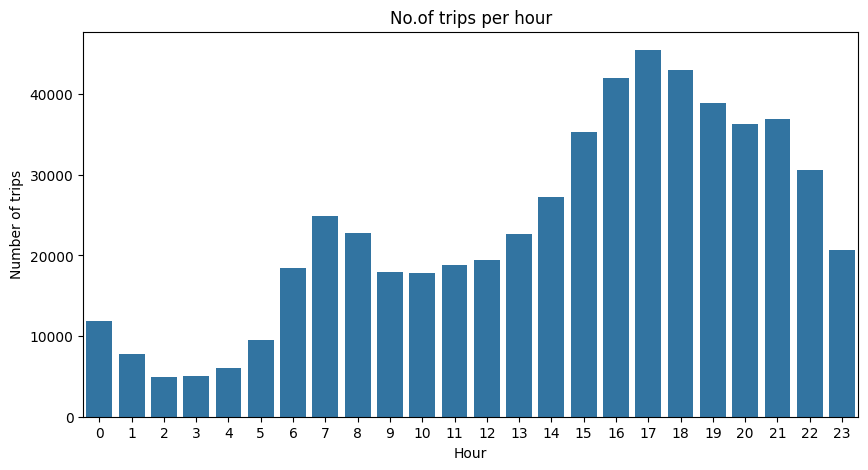

In [11]:
#plot Number of trips per hour
if data['Date/Time'].isnull().all():
    print("No valid trips to plot after date conversion.")
else:
    trips_per_hour = data['Hour'].value_counts()
    plt.figure(figsize=(10,5))
    sns.barplot(x=trips_per_hour.index, y= trips_per_hour.values)
    plt.xlabel('Hour')
    plt.ylabel('Number of trips')
    plt.title('No.of trips per hour')
    plt.show()

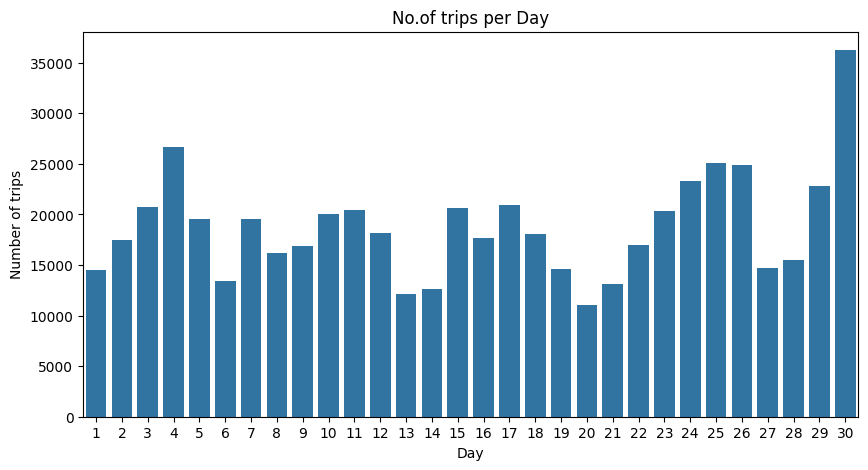

In [12]:
#plot number of trips per day
trips_per_day = data['Day'].value_counts()
plt.figure(figsize=(10,5))
sns.barplot(x=trips_per_day.index, y= trips_per_day.values)
plt.xlabel('Day')
plt.ylabel('Number of trips')
plt.title('No.of trips per Day')
plt.show()

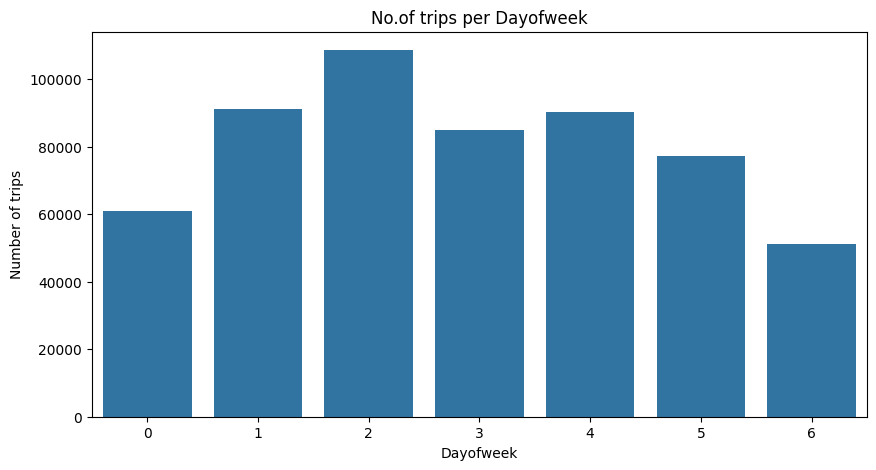

In [13]:
#plot number of trips per dayofweek
trips_per_dayofweek = data['Dayofweek'].value_counts()
plt.figure(figsize=(10,5))
sns.barplot(x=trips_per_dayofweek.index, y= trips_per_dayofweek.values)
plt.xlabel('Dayofweek')
plt.ylabel('Number of trips')
plt.title('No.of trips per Dayofweek')
plt.show()

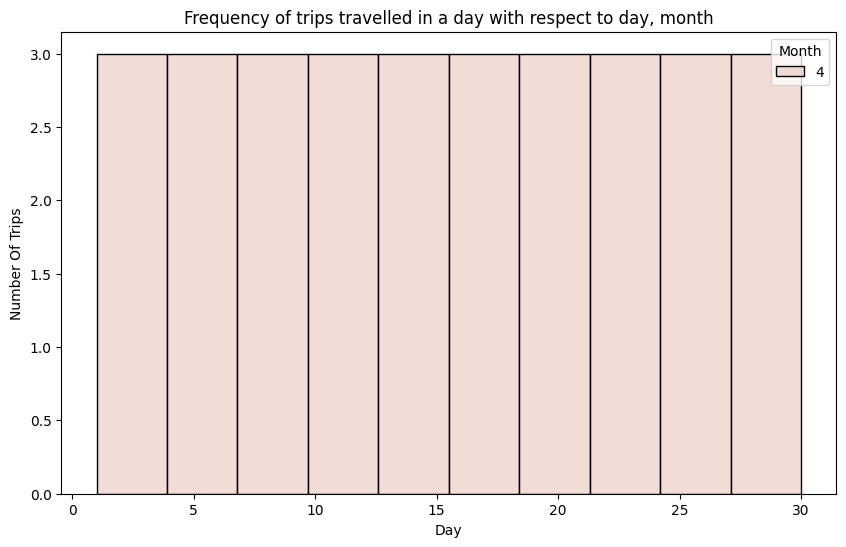

In [14]:
#Frequency of trips travelled in a day with respect to day,month
trips_per_day_month = data.groupby(['Day','Month']).size().reset_index(name='Trips')
plt.figure(figsize=(10,6))
sns.histplot(data=trips_per_day_month,bins=10, x='Day', hue='Month', multiple='stack')
plt.xlabel('Day')
plt.ylabel('Number Of Trips')
plt.title('Frequency of trips travelled in a day with respect to day, month')
plt.show()

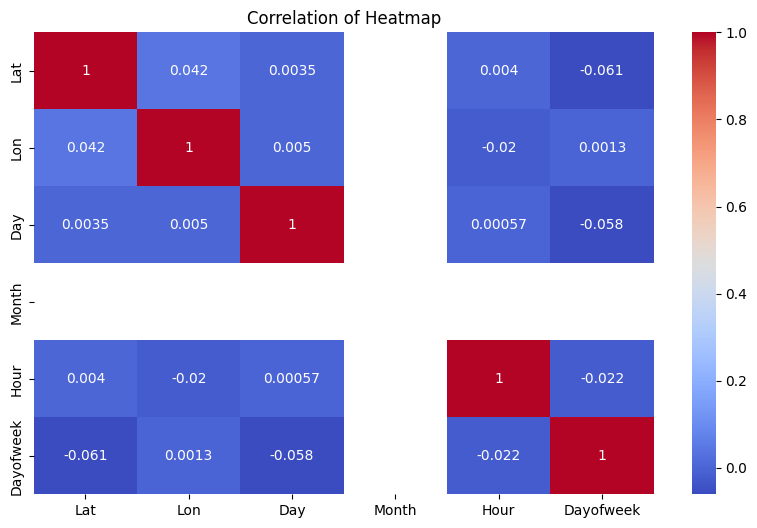

In [15]:
#plot heatmap of the dataset
plt.figure(figsize=(10,6))
sns.heatmap(data[['Lat', 'Lon', 'Day', 'Month', 'Hour', 'Dayofweek']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation of Heatmap')
plt.show()

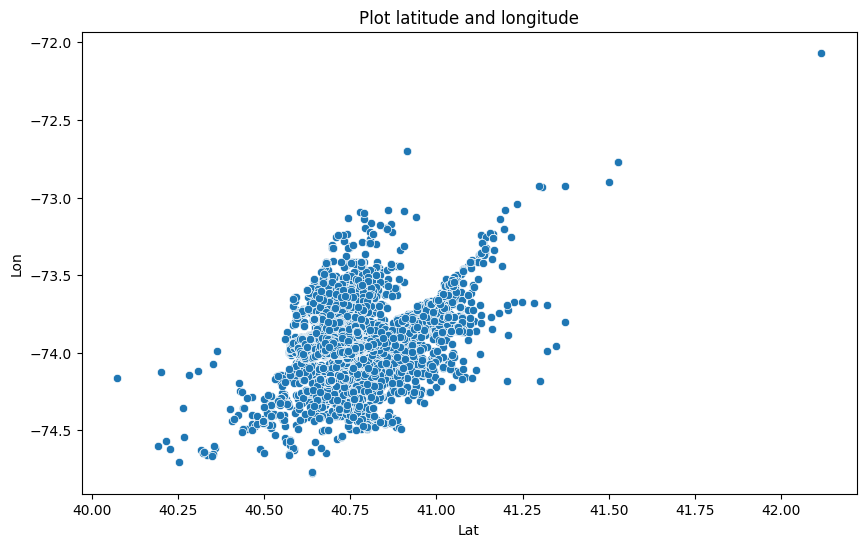

In [16]:
#plot lat, lon
plt.figure(figsize=(10,6))
sns.scatterplot(x='Lat',y='Lon',data=data)
plt.title('Plot latitude and longitude')
plt.show()


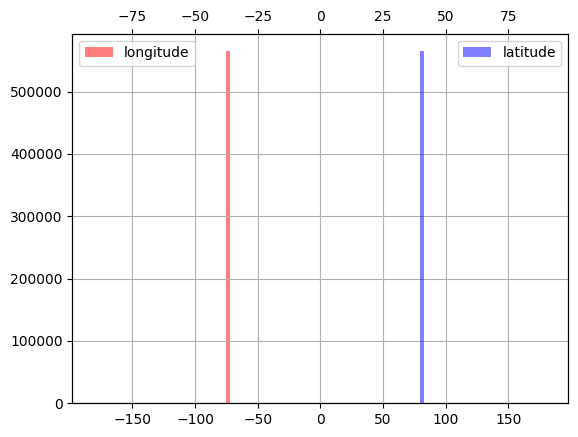

In [17]:
plt.hist(data['Lon'], bins=100, range=(-180,180), color='red', alpha=0.5, label='longitude')
plt.grid(True)
plt.legend(loc='upper left')
plt.twiny()
plt.hist(data['Lat'], bins=100, range=(-90,90), color='blue', alpha=0.5, label='latitude')
plt.legend(loc='upper right')
plt.legend(loc='best')
plt.show()

In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.cluster import KMeans

In [19]:
X = data[['Lat', 'Lon']]
kmeans = KMeans(n_clusters=5, random_state=0, n_init=10) # You can choose the number of clusters
data['Cluster'] = kmeans.fit_predict(X)

In [20]:
centroids = kmeans.cluster_centers_
centroids

array([[ 40.70048892, -74.20152276],
       [ 40.71972325, -73.99233788],
       [ 40.6598892 , -73.77686508],
       [ 40.7982781 , -73.87188553],
       [ 40.76305327, -73.97570267]])

In [21]:
clocation = pd.DataFrame(centroids, columns =['Latitude','Longitude'])

In [41]:
!pip install folium

Defaulting to user installation because normal site-packages is not writeable


In [42]:
import folium
centroids = clocation.values.tolist()
map = folium.Map(location=[40.7128, -74.0060], zoom_start=10)
for centroid in centroids:
  folium.Marker(location=[centroid[0],centroid[1]]).add_to(map)
map

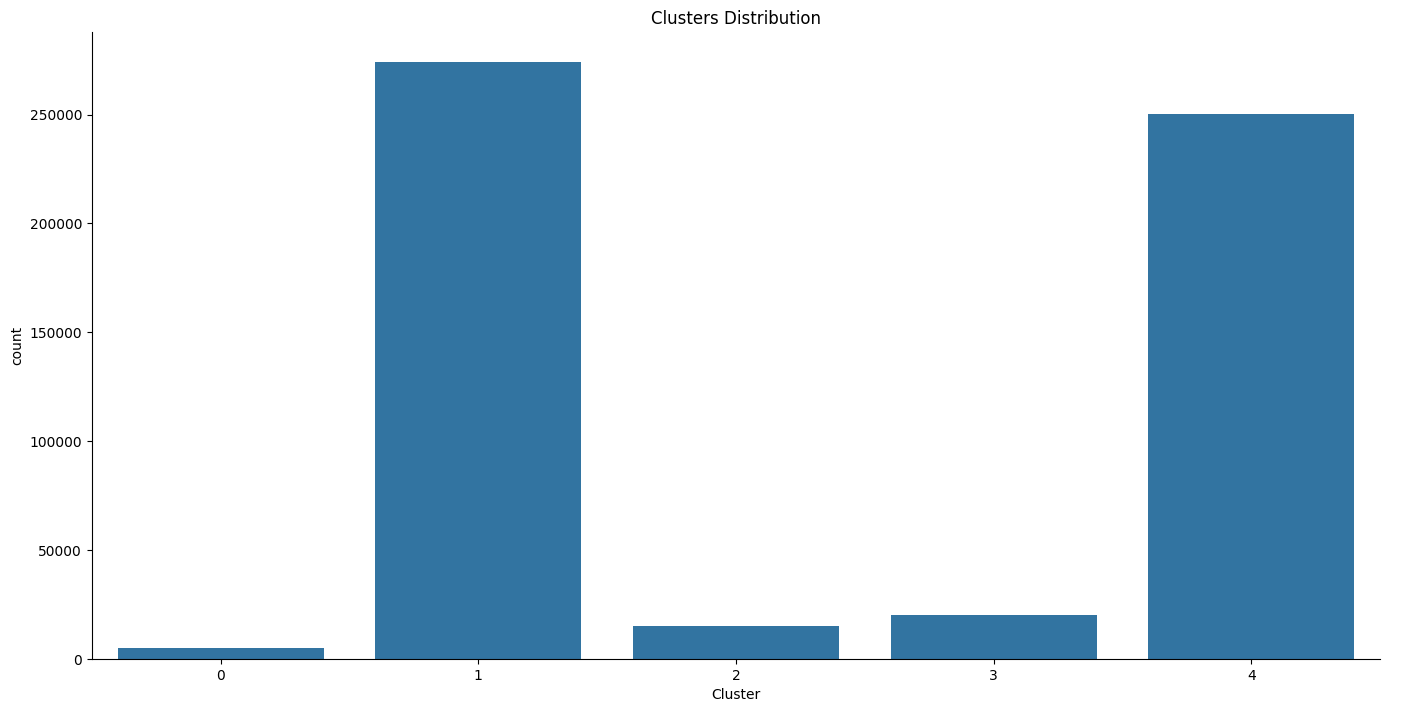

In [28]:
# total number of trips based on clusters
sns.catplot(data=data, x='Cluster', kind='count', height=7, aspect=2)
plt.title('Clusters Distribution')
plt.show()

In [29]:
#prediction of pickup based on clusters

count_3 = 0
count_0 = 0
for value in data['Cluster']:
  if value == 3:
    count_3 +=1
  if value == 0:
    count_0 +=1
print(count_3, count_0)



20057 4864


In [30]:
new_location = [(40.86, -75.56)]
kmeans.predict(new_location)

array([0])

In [31]:
clocation.head()

,Latitude,Longitude
0,40.700489,-74.201523
1,40.719723,-73.992338
2,40.659889,-73.776865
3,40.798278,-73.871886
4,40.763053,-73.975703


In [32]:
# Calculate total number of trips per month
trips_per_month_df = data.groupby('Month').size().reset_index(name='Total no.of Trips')

# Merge the total trips per month back to the original DataFrame
data = pd.merge(data, trips_per_month_df, on='Month', how='left')



In [33]:
data.head()

,Date/Time,Lat,Lon,Base,Day,Month,Hour,Dayofweek,Day_of_week,Cluster,Total no.of Trips
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512,1,4,0,1,Tuesday,4,564516
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512,1,4,0,1,Tuesday,1,564516
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512,1,4,0,1,Tuesday,1,564516
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512,1,4,0,1,Tuesday,4,564516
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512,1,4,0,1,Tuesday,4,564516


In [34]:
X = data[['Lat','Lon','Month','Day','Hour','Dayofweek']]
y = data['Total no.of Trips']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [35]:
# train a model
model = RandomForestRegressor(n_estimators=100,random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [36]:
y_pred = model.predict(X_test)

In [37]:
y_pred

array([564516., 564516., 564516., ..., 564516., 564516., 564516.])

In [38]:
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('R2 Score:', r2_score(y_test,y_pred))

Mean Squared Error: 0.0
R2 Score: 1.0


Text(0.5, 1.0, 'Actual VS Predicted Trips')

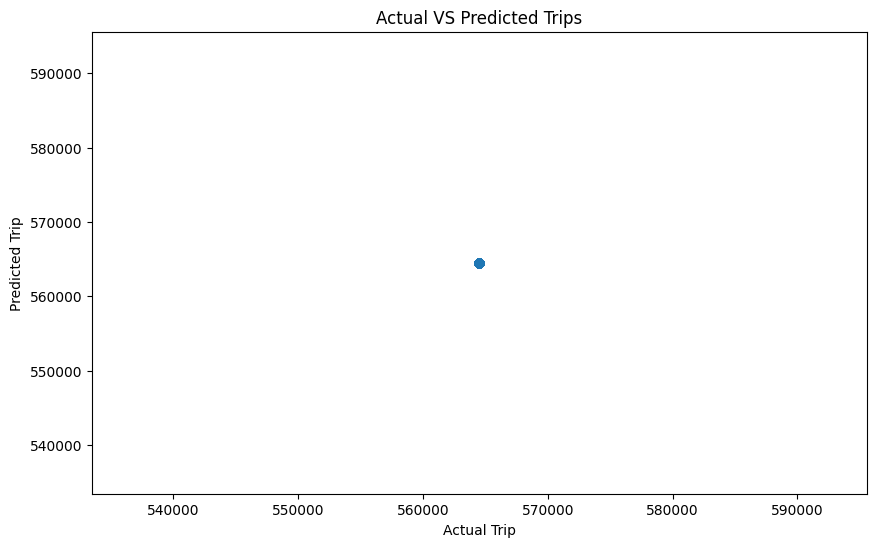

In [39]:
#plot Actual VS Predict RFR Model
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([min(y_test),max(y_test)],[min(y_test),max(y_test)], linestyle='--',color='orange')
plt.xlabel("Actual Trip")
plt.ylabel("Predicted Trip")
plt.title('Actual VS Predicted Trips')